## Observations and Insights 

* Box plots were used in the identification of outliers in regards to the four drug regiemns (Capomulin, Ramicane, Infubinol, and Caftamin) utilized in the experiments to control tumor volume for mouse speciemns. Capomulin and Ramicane were found to have slight outliers, but not statistically significant, as the Average Tumor Volume by Weight of Capomulin treated mice had a correlation coefficient of 0.95. 

* The cancer treatment for mice becomes less effective in correlation to  increase  in weight. 

* The gender demographics of mice population for the cancer research trial seems to be an almost even split with a ratio of 51:49 male to female.   

## Dependencies and Setup

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
df.head(11)

# df.shape
# (1893,8)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Counting Mice 
* Count and display the number of unique Mouse IDs in the dataset. 

* There are 249 unique mice. 

In [3]:
# Checking the number of mice.
counting_mice = df["Mouse ID"].value_counts()
counting_mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Duplicate 'Mouse ID' data
mouse_df = df.set_index("Mouse ID")
mouse_df.loc["g989"]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Getting Rid of Duplicate Mice
# df.drop_duplicates(subset=None, keep="first", inplace=False, ignore_index=False)

no_double_df = mouse_df.drop(["g989"])
no_double_df.shape

# (1880,7)
# original number of mice: 1893
# after duplicate removal: 1880
# difference: 13

(1880, 7)

In [6]:
# Display Cleaned Data
no_double_df.head(11)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
k403,Ramicane,Male,21,16,25,33.464577,1
k403,Ramicane,Male,21,16,30,31.099498,1
k403,Ramicane,Male,21,16,35,26.546993,1
k403,Ramicane,Male,21,16,40,24.365505,1


In [7]:
# Index "Mosue ID" In Cleaned Data Into A New DataFrame
c_df = no_double_df.reset_index()

# Recounting the number of mice.
c_df["Mouse ID"].value_counts()

# c_df.shape
# (1880, 8)

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
stat_group = c_df.groupby(["Drug Regimen"])

# Calculation of mean, median, variance, standard deviation, and SEM of the tumor volume.
stat_mean = stat_group["Tumor Volume (mm3)"].mean()
stat_med = stat_group["Tumor Volume (mm3)"].median()
stat_var = stat_group["Tumor Volume (mm3)"].var()
stat_std = stat_group["Tumor Volume (mm3)"].std()
stat_sem = stat_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
stat_df = pd.DataFrame({"Mean": stat_mean, 
                        "Median": stat_med, 
                        "Variance": stat_var,
                        "Standard Deviation": stat_std,
                        "SEM": stat_sem
                       })

# Display Summary Statistics for Mice 'Tumor Volume (mm3)' Group By 'Drug Regimen'
stat_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# Single .groupby function, pandas series, applied the aggregation functions, .agg()
stat2_df = c_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

# Display Summary Statistics Generated by .agg()
stat2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

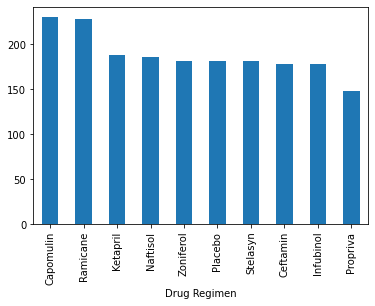

In [10]:
# DataFrame.plot() methods
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Conduct a groupby count per regimen
timepoint = c_df.groupby(["Drug Regimen"])["Timepoint"].count()

# bar graph with descending values
timepoint.sort_values(ascending=False).plot.bar()

# Display Basic Bar Chart Generated by DataFrame.plot()
plt.show()

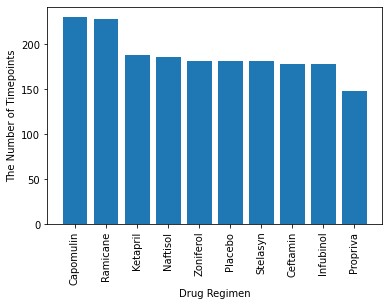

In [11]:
# pyplot methods
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# timepoint shortened as tp
tp = timepoint.sort_values(ascending=False)

# indexing timepoint in bar chart
plt.bar(tp.index, tp.values)

# x and y labels for bar chart
plt.ylabel("The Number of Timepoints", size=10) 
plt.xlabel("Drug Regimen")

# Use xticks to rotate vertially
plt.xticks(rotation="vertical")

# Display Bar Chart Generated Through PyPlot Methods
plt.show()

Text(0, 0.5, '')

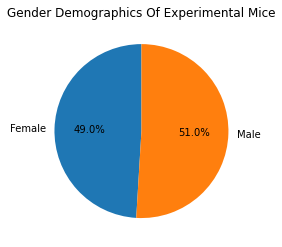

In [12]:
# Pandas Functions
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Grouping By Sex then conducting a count 
sex = c_df.groupby(["Sex"])["Sex"].count()

# Plotting Pie Chart Using Pandas 
pie_chart = sex.plot.pie(startangle=90, autopct='%1.1f%%', title="Gender Demographics Of Experimental Mice")

pie_chart.set_ylabel('')

In [13]:
# Set To DataFrame
sex_df = pd.DataFrame(sex)
sex_df

,Sex
Sex,
Female,922
Male,958


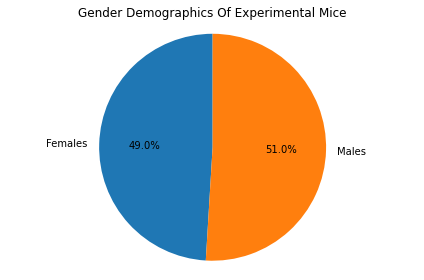

In [14]:
# Matplotlib.PyPlot Functions
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex2 = plt.pie(sex, labels=("Females", "Males"), startangle=90, autopct="%1.1f%%")

# title
plt.title("Gender Demographics Of Experimental Mice")

# Other formating 
plt.tight_layout()
plt.axis("equal")

# Display Pie Chart Generated By using Matplotlib's .pyplot()
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(c_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Max Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(c_df, max_tp_df, on="Mouse ID")

# Display Newly Merged Data
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []

# Looping to locate 'drugs' from DataFrame
for drug in drugs:
    t_df = merged_df.loc[merged_df["Drug Regimen"] == drug]
    
    # Subsetting until the obtaining the final volume
    final_volume_df = t_df.loc[t_df['Timepoint'] == t_df['Max Timepoint']]
    
    # Containing final volumes in a series for each regimen
    final_values = final_volume_df["Tumor Volume (mm3)"]
   
    # Appeneding to previous list, drug_values
    drug_values.append(final_values)
    

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_values.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # print f' string for iqr
    print(f'IQR for {drug}: {iqr}')
        
    # Determine outliers using upper and lower bounds, used in identifying outliers by regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # print upper and lower bounds
    print(f'Lower Bound of {drug}: {lower_bound}')
    print(f'Upper Bound of {drug}: {upper_bound}')
    
    # Scan for Outliers
    outliers = (final_values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper_bound) |
                                (final_volume_df["Tumor Volume (mm3)"] <= lower_bound)]).count()
    # print f' string
    print(f'Values for {drug} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower Bound of Capomulin: 20.70456164999999
Upper Bound of Capomulin: 51.83201549
Values for Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound of Ramicane: 17.912664470000003
Upper Bound of Ramicane: 54.30681135
Values for Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound of Infubinol: 36.83290494999999
Upper Bound of Infubinol: 82.74144559000001
Values for Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound of Ceftamin: 25.355449580000002
Upper Bound of Ceftamin: 87.66645829999999
Values for Ceftamin outliers: 0


In [17]:
# c_df (cleaned DataFrame)
Capomulin = c_df.loc[c_df["Drug Regimen"] == "Capomulin"]
Ramicane = c_df.loc[c_df["Drug Regimen"] == "Ramicane"]
Infubinol = c_df.loc[c_df["Drug Regimen"] == "Infubinol"]
Ceftamin = c_df.loc[c_df["Drug Regimen"] == "Ceftamin"]

x_cap = Capomulin["Tumor Volume (mm3)"]
x_ram = Ramicane["Tumor Volume (mm3)"]
x_inf = Infubinol["Tumor Volume (mm3)"]
x_cef = Ceftamin["Tumor Volume (mm3)"]


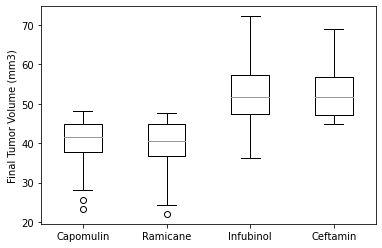

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot, box1 = plt.subplots()
box1.boxplot([x_cap, x_ram, x_inf, x_cef])
box1.set_ylabel("Final Tumor Volume (mm3)")
box1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


## Line and Scatter Plots

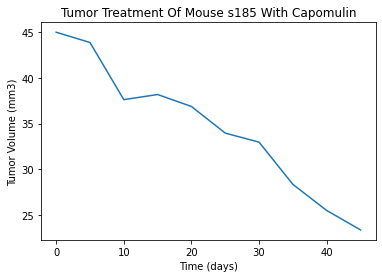

In [19]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
# Identify subject data, mouse treated with Capomulin
mouse_cap = merged_df.loc[merged_df["Mouse ID"] == "s185"]

# Line Plot with x-axis: 'Timepoint', y-axis: 'Tumor Volume (mm3)'
plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumor Volume (mm3)"])

# title, x, y labels
plt.title("Tumor Treatment Of Mouse s185 With Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display Line Plot
plt.show()


In [20]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
# Isolate data, DataFrame: cap_df
cap_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
cap_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


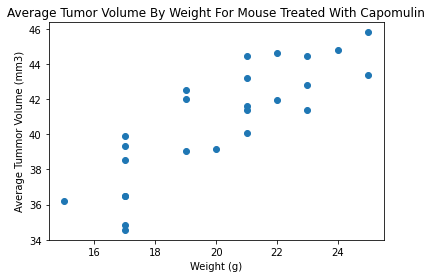

In [21]:
# Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
# y-axis, tumor volume versus x-axis, mouse weight

# Find average mouse tumor volume
avg_vol_df = pd.DataFrame(cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# Merger of avg_vol_df into prevous DataFrame
avg_vol_df = pd.merge(cap_df, avg_vol_df, on="Mouse ID")
# Drop Duplicates In Final Volume DataFrame
final_avg_vol_df = avg_vol_df[["Weight (g)", "Average Tumor Volume (mm3)"]].drop_duplicates()
# Display DataFrame
final_avg_vol_df

# Redefine x,y-axis
x_axis = final_avg_vol_df["Weight (g)"]
y_axis = final_avg_vol_df["Average Tumor Volume (mm3)"]

# Scatter Plot
plt.scatter(x_axis, y_axis)

# title and x,y-axis labels 
plt.title("Average Tumor Volume By Weight For Mouse Treated With Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tummor Volume (mm3)")

# Display Scatter Plot
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# code taken from previous scatter plot 
avg_vol_df = pd.DataFrame(cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg_vol_df = pd.merge(cap_df, avg_vol_df, on="Mouse ID")
final_avg_vol_df = avg_vol_df[["Weight (g)", "Average Tumor Volume (mm3)"]].drop_duplicates()
final_avg_vol_df
x_axis = final_avg_vol_df["Weight (g)"]
y_axis = final_avg_vol_df["Average Tumor Volume (mm3)"]

# Correlation Coeffiecient Mouse Weight vs Average Tumor Volume
correlation=st.pearsonr(x_axis, y_axis)

# Conclustion (has to be put in multiline comment string to work?)
print(f"""The correlation b/w the mouse weight undergoing Capomulin regimen vs. average tumor volume is {round(correlation[0], 2)}.""")


The correlation b/w the mouse weight undergoing Capomulin regimen vs. average tumor volume is 0.84.


In [29]:
# Linear Regression Calculations 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "Y = " + str(round(slope, 2)) + "X + " + str(round(intercept, 2))

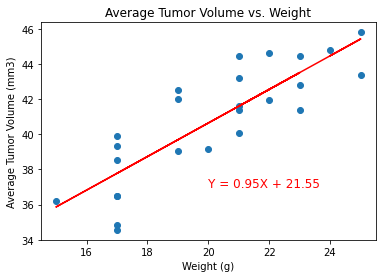

In [30]:
# Scatter Plot
plt.scatter(x_axis, y_axis)
# Linear Regression
plt.plot(x_axis,regress_values,"r-")
# Annotation of Linear Regression
plt.annotate(line_eq, (20,37), fontsize=12, color="red")
# Title & Labeling 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight")
# Display Scatter Plot
plt.show()